In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from gaia_download import vari_class
import gPhoton
from download_isochrone import load_isochrone

In [2]:
CLUSTER_NAME: str = 'NGC 188'

In [44]:
clustered = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
isochrone = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

# BSS variability

In [3]:
bss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')

In [4]:
bss_candidates.head()

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_z,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,label
0,96412,1636148068921376768,Gaia DR3 573738468889035264,573738468889035264,135807148,2016.0,13.928628,0.015846,84.823386,0.013835,...,0.672266,0.548142,0.344032,0.203546,0.131328,0.640486,0.001370,2.739530,0.070370,252
1,101215,1636148068921376768,Gaia DR3 573937617933289856,573937617933289856,442857150,2016.0,12.523486,0.015359,85.165053,0.014466,...,0.624247,0.508989,0.319458,0.189007,0.121948,0.680570,0.001866,2.828010,0.069148,252
2,101295,1636148068921376768,Gaia DR3 573938305128033920,573938305128033920,1315389913,2016.0,12.227328,0.020073,85.210201,0.018288,...,0.333786,0.272157,0.170815,0.101062,0.065206,0.602583,0.001626,3.267815,0.077564,252
3,101307,1636148068921376768,Gaia DR3 573938408207239296,573938408207239296,451142942,2016.0,12.083431,0.013404,85.224191,0.011774,...,0.410705,0.334874,0.210178,0.124352,0.080232,0.288062,0.004546,2.483414,0.055733,252
4,101377,1636148068921376768,Gaia DR3 573939404639640704,573939404639640704,65868889,2016.0,13.107909,0.010876,85.257747,0.010012,...,0.480190,0.391530,0.245737,0.145390,0.093806,0.662986,0.000996,1.828611,0.047085,252


In [6]:
bss_var = bss_candidates[bss_candidates.phot_variable_flag=='VARIABLE']

In [7]:
bss_classes = vari_class(bss_var.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


In [8]:
bss_classes

,source_id,in_vari_rrlyrae,in_vari_cepheid,in_vari_planetary_transit,in_vari_short_timescale,in_vari_long_period_variable,in_vari_eclipsing_binary,in_vari_rotation_modulation,in_vari_ms_oscillator,in_vari_agn,in_vari_microlensing,in_vari_compact_companion
0,573945825613372160,false,false,false,false,false,false,false,false,false,false,false
1,573968576057423360,false,false,false,false,false,false,false,false,false,false,false


In [10]:
bss_candidates.ruwe

0     1.054645
1     0.972409
2     1.281306
3     1.009521
4     1.070724
5     1.496976
6     1.210643
7     0.994487
8     1.009080
9     1.036566
10    0.955973
11    0.975492
12    0.962923
13    0.921948
14    1.001349
15    1.223450
16    0.998758
17    1.030183
18    1.410349
19    1.278761
20    1.274238
21    1.293116
22    1.007165
23    1.014542
24    1.143877
25    0.988603
26    1.033707
27    1.396657
28    0.998338
29    1.116146
30    1.230799
Name: ruwe, dtype: float64

In [11]:
bss_candidates[bss_candidates.ruwe>1.4]['has_epoch_photometry']

5     False
18    False
Name: has_epoch_photometry, dtype: bool

In [18]:
bss_rv_amplitude = bss_candidates.dropna(subset=['rv_amplitude_robust'])
bss_rv_amplitude

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_z,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,label
23,101993,1636148068921376768,Gaia DR3 573945825613372160,573945825613372160,1442349969,2016.0,9.774005,0.011069,85.155966,0.01107,...,0.432171,0.352377,0.221163,0.130851,0.084425,0.311924,0.001641,0.978831,0.036832,252


In [19]:
np.abs(bss_rv_amplitude.rv_amplitude_robust)>=6*bss_rv_amplitude.radial_velocity_error

23    True
dtype: bool

In [20]:
bss_rv_amplitude.parallax_over_error

23    58.95927
Name: parallax_over_error, dtype: float64

In [21]:
bss_rv_amplitude.ruwe

23    1.014542
Name: ruwe, dtype: float64

In [22]:
bss_rv_amplitude.G_abs

23    0.978831
Name: G_abs, dtype: float64

In [24]:
bss_rv_amplitude['BP-RP']

23    0.311924
Name: BP-RP, dtype: float64

In [31]:
for _, bss in bss_var.iterrows():
    print(f'{bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

9.7740046512694, 85.15596608877337:
NUV: 435.0s (raw) in 4 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101969.995 ], 113.000 seconds
    [ 820042006.995, 820042123.995 ], 117.000 seconds
    [ 842401239.995, 842401334.995 ], 95.000 seconds
FUV: 435.0s (raw) in 4 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101969.995 ], 113.000 seconds
    [ 820042006.995, 820042123.995 ], 117.000 seconds
    [ 842401239.995, 842401334.995 ], 95.000 seconds

11.089231312827485, 85.44167325728058:
NUV: 224.0s (raw) in 2 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101970.995 ], 114.000 seconds
FUV: 224.0s (raw) in 2 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101970.995 ], 114.000 seconds



# YSS variability

In [32]:
yss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')

In [33]:
yss_var = yss_candidates[yss_candidates.phot_variable_flag=='VARIABLE']

In [34]:
yss_classes = vari_class(yss_var.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


In [35]:
yss_classes

,source_id,in_vari_rrlyrae,in_vari_cepheid,in_vari_planetary_transit,in_vari_short_timescale,in_vari_long_period_variable,in_vari_eclipsing_binary,in_vari_rotation_modulation,in_vari_ms_oscillator,in_vari_agn,in_vari_microlensing,in_vari_compact_companion
0,573941053907094144,false,false,false,false,false,false,false,false,false,false,false
1,573941393208434688,false,false,false,false,false,false,false,false,false,false,false


In [37]:
yss_candidates.non_single_star

0    0
1    0
2    0
3    0
4    0
Name: non_single_star, dtype: int64

In [38]:
yss_rv_amplitude = yss_candidates.dropna(subset=['rv_amplitude_robust'])
yss_rv_amplitude

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_z,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,label
0,96482,1636148068921376768,Gaia DR3 573741423826924928,573741423826924928,1707904325,2016.0,14.137629,0.009772,84.977945,0.009203,...,0.576228,0.469836,0.294884,0.174468,0.112567,1.034944,0.000885,0.279925,0.040120,252
4,101610,1636148068921376768,Gaia DR3 573941393208434688,573941393208434688,1193481149,2016.0,11.987732,0.010597,85.248891,0.009593,...,0.576228,0.469836,0.294884,0.174468,0.112567,1.145790,0.003619,-0.034399,0.044542,252


In [39]:
np.abs(yss_rv_amplitude.rv_amplitude_robust)>=6*yss_rv_amplitude.radial_velocity_error

0    True
4    True
dtype: bool

In [40]:
%matplotlib notebook

<IPython.core.display.Javascript object>


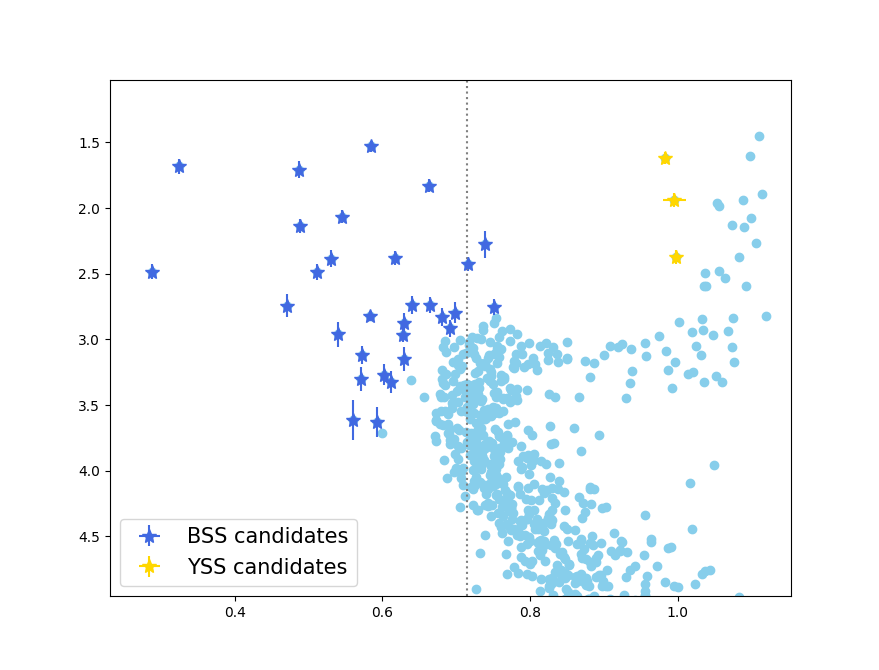

In [47]:
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue')
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.show();